<h1>Laboratorio 1 Parte 1 Automatización 2<h1>
<h2>Machine Learning y Deep Learning<h2>

<h3>Predict Calorie Expenditure<h3>
Dataset: https://www.kaggle.com/datasets/adilshamim8/predict-calorie-expenditure

**1. Análisis preliminar del problema**

Para el dataset seleccionado:

*a. Determine si se trata de un problema de clasificación o regresión.*
Justifique su respuesta e indique claramente el target (variable
objetivo).

El Modelo predictivo que se busca crear con este dataset es del tipo regresión. Esto debido a que los valores que toma su target (variable objetivo) "Calories" son números reales, y lo que se busca predecir es un número real que indique la cantidad de calorias quemadas a partir de caracteristicas biometricas y relacionadas con la actividad física. 

*b. Clasifique las características en tipos de variables (numéricas,categóricas, binarias, ordinales, etc.).*

Tenemos 8 caracteristicas las cuales 7 numericas y 1 categórica:

|**Númericas**|**Categóricas**|
|---|---|
|id, Age, Height, Weight, Duration, Heart_Rate, Body_Temp|Sex|




*c. Investigue y explique el protocolo de adquisición y/o generación de datos que siguieron los investigadores.*

El dataset fue generado sintéticamente a partir de datos reales de calorías quemadas, usando un modelo de deep learning como generador de datos artificiales, con modificaciones estadísticas deliberadas para evitar el sobreajuste a las soluciones conocidas.

**2. Análisis exploratorio de datos (EDA)**

Realice un EDA completo sobre el dataset:
* Distribuciones de las variables.
* Estadísticos descriptivos.
* Correlaciones entre variables.
* Relación entre variables predictoras y el target.

Cada gráfico o estadística debe ir acompañado de una
interpretación detallada, en la cual explique qué información
aporta al problema de ML.

Utilice librerías como pandas, numpy, matplotlib y seaborn.

|Nombre de la columna|	Descripción|
|--------------------|-------------|
|id | Identificador único para cada observación del conjunto de entrenamiento. Se utiliza con fines de indexación y referencia.|
|Sex |	Sexo biológico del individuo (p. ej., masculino o femenino). Influye en la tasa metabólica y el consumo de calorías.|
|Age |	Edad del individuo en años. La tasa metabólica generalmente disminuye con la edad, lo que afecta el gasto energético.|
|Height	| Altura del individuo en centímetros. Contribuye a métricas de composición corporal como el IMC.|
|Weight |	Peso del individuo en kilogramos. Un factor clave en la cantidad de energía quemada durante la actividad.|
|Duration | Duración de la actividad física o ejercicio en minutos. Una duración más prolongada suele resultar en un mayor consumo de calorías.|
|Heart_Rate |	Frecuencia cardíaca durante la actividad en pulsaciones por minuto (PPM). Indica la intensidad del ejercicio, que se correlaciona directamente con el gasto energético.|
|Body_Temp	| Temperatura corporal durante la actividad en grados Celsius. Refleja el esfuerzo fisiológico y la actividad termogénica.|
|Calories (Target) | Número total de calorías quemadas durante la sesión de actividad. Este es el valor que el modelo busca predecir.|

In [137]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
db = pd.read_csv("train.csv")
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [139]:
db.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Corfirmamos la cantidad de caracteristicas, muestras y que no existen valores faltantes o nulos en el dataset, y un vistazo por algunas muestras nos sirve para familiarizarnos con los datos presentes.

In [140]:
db.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [141]:
db.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,750000.0,NaN,NaN,NaN,374999.5,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
Sex,750000,2,female,375721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,750000.0,NaN,NaN,NaN,41.420404,15.175049,20.0,28.0,40.0,52.0,79.0
Height,750000.0,NaN,NaN,NaN,174.697685,12.824496,126.0,164.0,174.0,185.0,222.0
Weight,750000.0,NaN,NaN,NaN,75.145668,13.982704,36.0,63.0,74.0,87.0,132.0
Duration,750000.0,NaN,NaN,NaN,15.421015,8.354095,1.0,8.0,15.0,23.0,30.0
Heart_Rate,750000.0,NaN,NaN,NaN,95.483995,9.449845,67.0,88.0,95.0,103.0,128.0
Body_Temp,750000.0,NaN,NaN,NaN,40.036253,0.779875,37.1,39.6,40.3,40.7,41.5
Calories,750000.0,NaN,NaN,NaN,88.282781,62.395349,1.0,34.0,77.0,136.0,314.0


El punto describe nos da el primer acercamiento a las estadisticas presentes en el dataset, el promedio, minimos y maximos nos ayudan a identificar datos extraños 

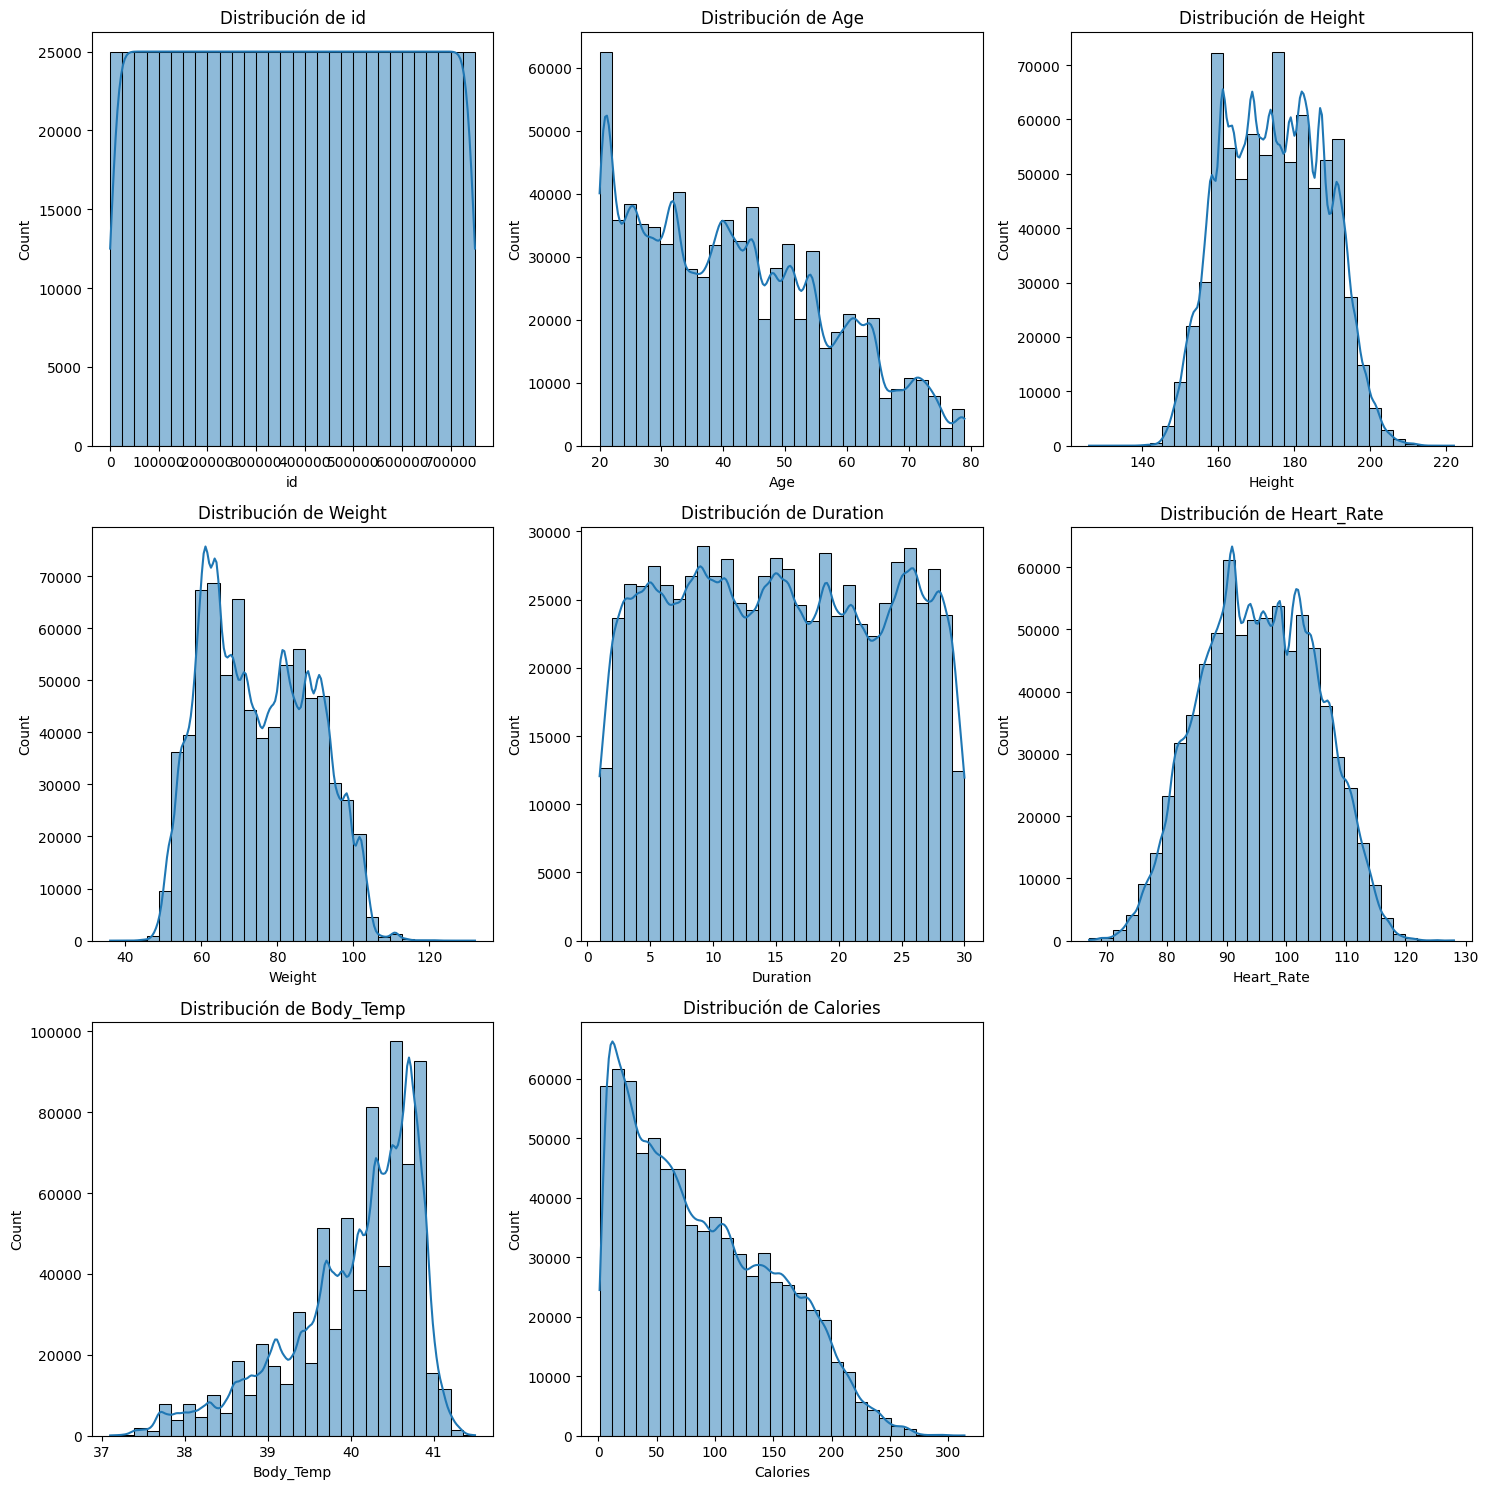

In [ ]:

#Variables numéricas
num_cols = db.select_dtypes(include=np.number).columns

# Definir filas y columnas para la figura
n_cols = 3  # número de columnas en la cuadrícula
n_rows = int(np.ceil(len(num_cols) / n_cols))  # calcula filas necesarias

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(db[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()



Con ayuda de histogramas podemos ver la distibución de las variables númericas, e identificar desbalaceos, outliner, categorias raras o si los valores tienen sesgos a la derecha o izquierda.

Los patrones en la población estudiado tambien se hacen evidentes con ayuda de las gráficas, por ejmplo de hay más personas jovenes o el rango promedio de altura.

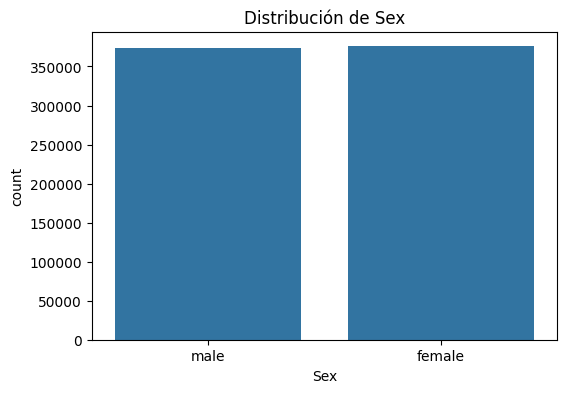

In [143]:
for col in db.select_dtypes(include="object").columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=db)
    plt.title(f"Distribución de {col}")
    plt.show()

Al graficar la variable categorica obtenemos que no hay desbalance por sexo y que no causará de algún sesgo.

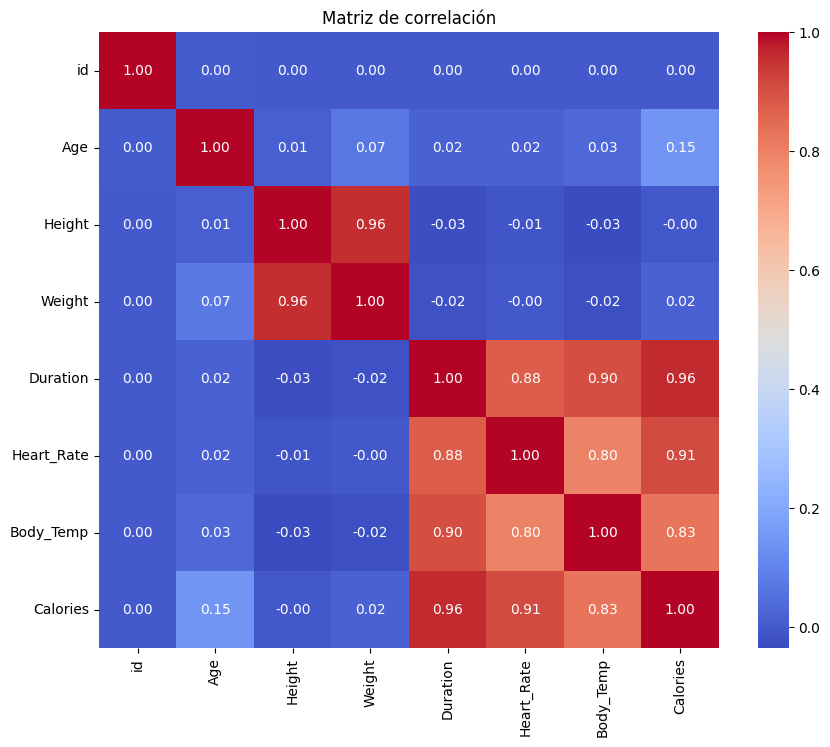

In [144]:
db1=db.drop(columns="Sex")
plt.figure(figsize=(10,8))
sns.heatmap(db1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

Con ayuda de un mapa de calor graficamos la matriz de correlación entre las variables, de esta podemos obtener información sobre que caracteristicas ayudan al modelo a una mejor predicción, siendo aquellas que tiene una correlación cercana a 1 con el target en nuestro caso Calories. Las 3 caracteristicas que demuestran mayor relacion con la variable objetivo son Duration, Heart_Rate y Body_Temp, cosa que tambien entre ellas guardan una alta correlación, al ser tan pocas caractersiticas y sumado a que se usaran modelos que son robustos a la colinealidad (árboles, random forest, redes neuronales) no se reduciran ni eliminaran.

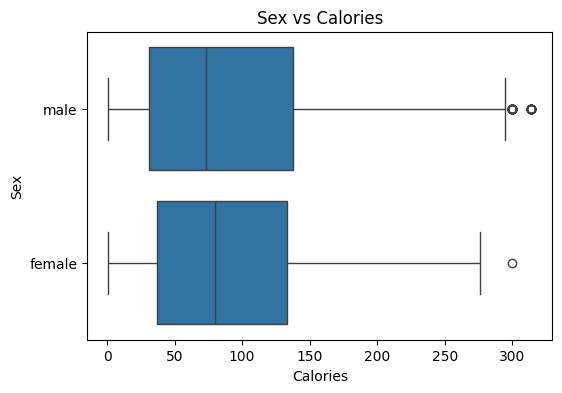

In [145]:
for col in db.select_dtypes(include=object).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Calories", y=col, data=db)
    plt.title(f"{col} vs Calories")
    plt.show()


Con ayuda del boxplot se puede conocer los rangos donde el modelos deberia comportarse mejor a la hora de evaluarse, al igual que nos muestra outliers.

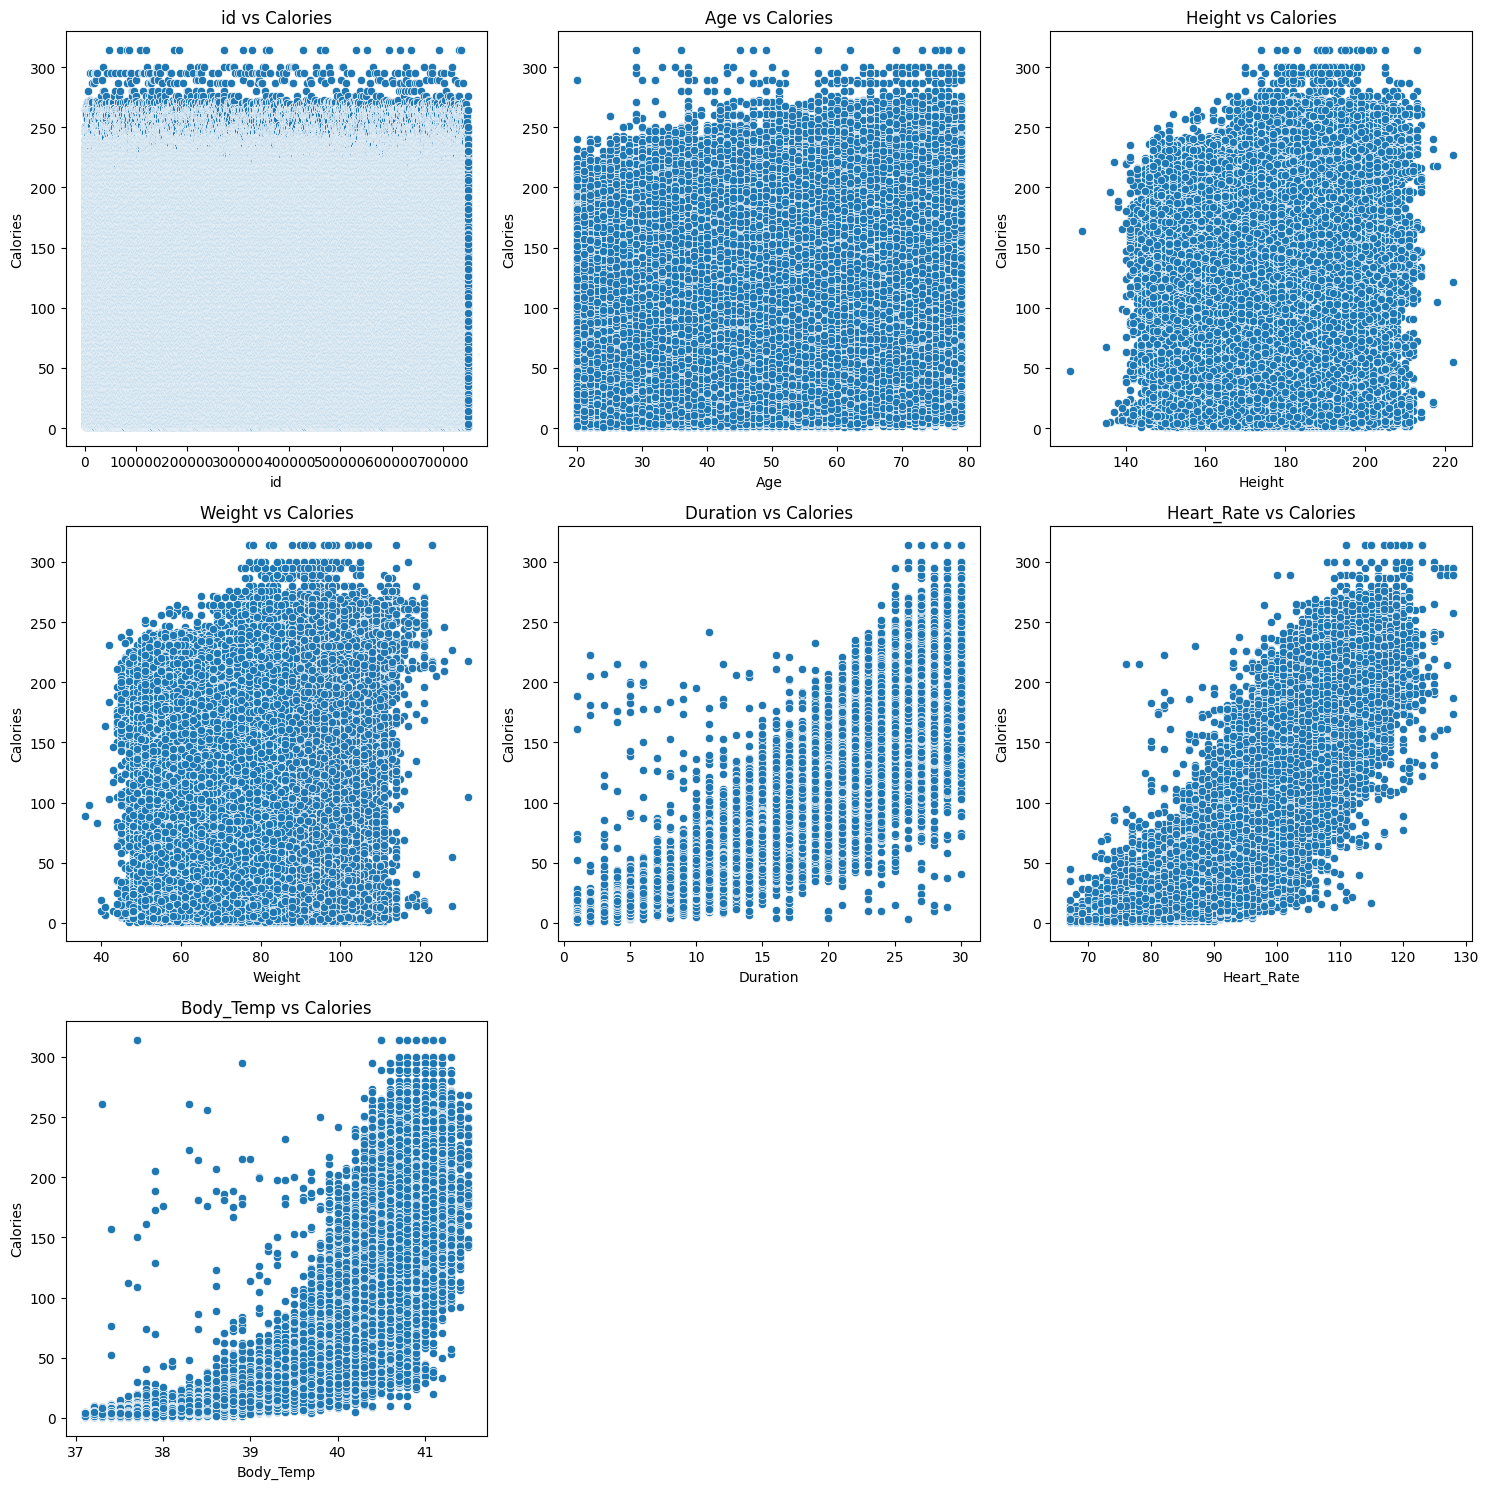

In [146]:
num_cols = db.drop(columns=["Calories"]).select_dtypes(include=np.number).columns

# Definir filas y columnas para la figura
n_cols = 3  # número de columnas en la cuadrícula
n_rows = int(np.ceil(len(num_cols) / n_cols))  # calcula filas necesarias

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=col, y="Calories", data=db)
    plt.title(f"{col} vs Calories")

plt.tight_layout()
plt.show()


Con scaterplot podemos observar que tipo de correlación tienen las caracteristicas con el target, por ejemplo con Duration y Heart_Rate se observa una proporcionalidad directa con Calories, y terminamos de confirmar que id no aporta nada al modelo, por lo que se eliminara en el procesamiento.

**3. Procesamiento de datos**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf
import random

random_state=8

La base de datos cuenta con 750000 muestras por lo que el 70% de eso es suficiente para que el modelo no se sobreajuste, con un 15% de validación es más que suficiente para ajustar hiperparametros y 15% de prueba nos permite revisar si el modelo generaliza bien con bastantes variedad de datos nuevos

In [148]:
# Separemos nuestros datos en conjuntos de entrenamiento, validación y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    db.drop(columns=['Calories',"id"]),
    db['Calories'],
    test_size=0.3,
    random_state=random_state
)
X_val, X_test, y_val, y_test = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    random_state=random_state
)

num_cols = X_train.select_dtypes(include="number").columns
cat_cols = X_train.select_dtypes(exclude="number").columns

In [ ]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])



In [150]:
X_train

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
301209,female,25,179.0,75.0,14.0,93.0,40.1
69696,male,23,177.0,77.0,21.0,98.0,40.4
470174,male,29,174.0,69.0,6.0,81.0,39.7
610521,male,21,188.0,88.0,24.0,104.0,41.0
259894,female,27,167.0,62.0,30.0,109.0,40.8
...,...,...,...,...,...,...,...
324570,female,55,176.0,76.0,26.0,102.0,40.5
231557,female,29,162.0,56.0,7.0,89.0,39.4
149489,male,43,181.0,85.0,4.0,91.0,39.2
550228,male,42,156.0,62.0,15.0,96.0,40.4


In [151]:
preprocessor.fit(X_train)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [152]:
pd.DataFrame(preprocessor.transform(X_train))

,0,1,2,3,4,5,6,7
0,-1.080834,0.335678,-0.010313,-0.170380,-0.263305,0.081655,1.0,0.0
1,-1.212640,0.179771,0.132650,0.667474,0.265564,0.466284,0.0,1.0
2,-0.817220,-0.054089,-0.439204,-1.127927,-1.532589,-0.431183,0.0,1.0
3,-1.344447,1.037260,0.918950,1.026555,0.900206,1.235541,0.0,1.0
4,-0.949027,-0.599764,-0.939576,1.744715,1.429074,0.979122,1.0,0.0
...,...,...,...,...,...,...,...,...
524995,0.896270,0.101818,0.061169,1.265942,0.688658,0.594493,1.0,0.0
524996,-0.817220,-0.989531,-1.368466,-1.008234,-0.686400,-0.815811,1.0,0.0
524997,0.105429,0.491585,0.704504,-1.367314,-0.474852,-1.072230,0.0,1.0
524998,0.039525,-1.457252,-0.939576,-0.050686,0.054016,0.466284,0.0,1.0


**4. Entrenamiento de modelos**

In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers  import KerasRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [154]:
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # imputación, codificación, escalado, etc.

    ("knn", KNeighborsRegressor(n_neighbors=2, n_jobs=-1))
])
knn_pipeline

,steps,"[('preprocessor', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [155]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(
        n_estimators=5,
        max_depth=None,
        random_state=random_state,
        n_jobs=-1
    ))
])
rf_pipeline

,steps,"[('preprocessor', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [156]:
def build_dnn_regression():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1]+1,)), # nº de features
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="linear")       # salida continua
    ])
    model.summary()
    model.compile(
        optimizer="adam", 
        loss="mse",          # también puede "mae"
        metrics=["mae", "mse"]
    )
    return model
build_dnn_regression


<function __main__.build_dnn_regression()>

In [157]:
dnn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("dnn", KerasRegressor(
        model=build_dnn_regression,
        epochs=5,
        batch_size=512,
        verbose=0,
        random_state=random_state
         ))
         ])
dnn_pipeline

,steps,"[('preprocessor', ...), ('dnn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [158]:
knn_model = knn_pipeline.fit(X_train,y_train)

In [159]:
rf_model = rf_pipeline.fit(X_train,y_train)

In [160]:
dnn_model = dnn_pipeline.fit(X_train,y_train)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
def ajustar_modelo(nombre, modelo, X_train, y_train, X_val, y_val):
    resultados = {}
    for split, X, y in [("Train", X_train, y_train), ("Val", X_val, y_val)]:
        y_pred = modelo.predict(X)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_pred)
        resultados[(nombre, split)] = [mae, rmse, r2]
    return resultados

#Aplicación de la uso
res_knn = ajustar_modelo("kNN", knn_pipeline, X_train, y_train, X_val, y_val)
res_rf  = ajustar_modelo("RandomForest", rf_pipeline, X_train, y_train, X_val, y_val)
res_dnn = ajustar_modelo("DNN", dnn_pipeline, X_train, y_train, X_val, y_val)

# Combinar resultados en tabla
resultados = {**res_knn, **res_rf,**res_dnn}
tabla = pd.DataFrame.from_dict(resultados, orient="index", columns=["MAE","RMSE","R²"])
print(tabla)


                            MAE      RMSE        R²
(kNN, Train)           2.022050  3.065561  0.997586
(kNN, Val)             3.434960  5.166855  0.993102
(RandomForest, Train)  1.032799  1.921814  0.999051
(RandomForest, Val)    2.514770  4.120302  0.995614
(DNN, Train)           2.226674  3.705532  0.996473
(DNN, Val)             2.214966  3.646930  0.996564


In [162]:
def ajustar_modelo(nombre, modelo, X_train, y_train, X_val, y_val):
    resultados = {}
    for split, X, y in [("Train", X_train, y_train), ("Val", X_val, y_val)]:
        y_pred = modelo.predict(X)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_pred)
        resultados[(nombre, split)] = [mae, rmse, r2]
    return resultados
def modelos_hip(vecinos=2,arboles=5, epocas_dnn=5):
    knn_pipeline = Pipeline([
        ("preprocessor", preprocessor),  # imputación, codificación, escalado, etc.
        ("knn", KNeighborsRegressor(n_neighbors=vecinos, n_jobs=-1))
    ])

    rf_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("rf", RandomForestRegressor(
            n_estimators=vecinos,
            max_depth=None,
            random_state=random_state,
            n_jobs=-1
        ))
    ])

    def build_dnn_regression():
        model = keras.Sequential([
            layers.Input(shape=(X_train.shape[1]+1,)),   # nº de features
            layers.Dense(128, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(1, activation="linear")       # salida continua
        ])
        model.compile(
            optimizer="adam", 
            loss="mse",          # también puede "mae"
            metrics=["mae", "mse"]
        )
        return model

    dnn_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("dnn", KerasRegressor(
            model=build_dnn_regression,
            epochs=epocas_dnn,
            batch_size=512,
            verbose=0,
            random_state=random_state
            
            ))
            ])
    
    return knn_pipeline, rf_pipeline, dnn_pipeline
i=0
for a, b ,c in [(4,10,10),(5,15,15),(8,20,20)]:
 
    knn_pipeline, rf_pipeline, dnn_pipeline = modelos_hip(a,b,c)

    knn_model = knn_pipeline.fit(X_train,y_train)
    rf_model = rf_pipeline.fit(X_train,y_train)
    dnn_model = dnn_pipeline.fit(X_train,y_train)

        #Aplicación de la uso
    res_knn = ajustar_modelo("kNN", knn_pipeline, X_train, y_train, X_val, y_val)
    res_rf  = ajustar_modelo("RandomForest", rf_pipeline, X_train, y_train, X_val, y_val)
    res_dnn = ajustar_modelo("DNN", dnn_pipeline, X_train, y_train, X_val, y_val)

    # Combinar resultados en tabla
    resultados = {**res_knn, **res_rf,**res_dnn}
    tabla = pd.DataFrame.from_dict(resultados, orient="index", columns=["MAE","RMSE","R²"])
    print("modelo",i+1,'\n',tabla,'\n')
    i+=1

modelo 1 
                             MAE      RMSE        R²
(kNN, Train)           2.408470  3.620778  0.996633
(kNN, Val)             3.061507  4.651148  0.994411
(RandomForest, Train)  1.058442  2.032404  0.998939
(RandomForest, Val)    2.566398  4.214304  0.995411
(DNN, Train)           2.207272  3.676925  0.996527
(DNN, Val)             2.195442  3.624650  0.996606 

modelo 2 
                             MAE      RMSE        R²
(kNN, Train)           2.463904  3.724055  0.996438
(kNN, Val)             2.976284  4.541301  0.994672
(RandomForest, Train)  1.032799  1.921814  0.999051
(RandomForest, Val)    2.514770  4.120302  0.995614
(DNN, Train)           2.198447  3.661254  0.996557
(DNN, Val)             2.186937  3.614819  0.996624 

modelo 3 
                             MAE      RMSE        R²
(kNN, Train)           2.543338  3.880148  0.996133
(kNN, Val)             2.856008  4.379059  0.995045
(RandomForest, Train)  0.982354  1.745536  0.999217
(RandomForest, Val)    2.43

In [163]:
def evaluar_modelo(nombre, modelo, X_train, y_train, X_val, y_val, X_test, y_test):
    resultados = {}
    for split, X, y in [("Train", X_train, y_train), ("Val", X_val, y_val), ("Test", X_test, y_test)]:
        y_pred = modelo.predict(X)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_pred)
        resultados[(nombre, split)] = [mae, rmse, r2]
    return resultados

#Aplicación de la uso
res_knn = evaluar_modelo("kNN", knn_pipeline, X_train, y_train, X_val, y_val, X_test, y_test)
res_rf  = evaluar_modelo("RandomForest", rf_pipeline, X_train, y_train, X_val, y_val, X_test, y_test)
res_dnn = evaluar_modelo("DNN", dnn_pipeline, X_train, y_train, X_val, y_val, X_test, y_test)

# Combinar resultados en tabla
resultados = {**res_knn, **res_rf,**res_dnn}
tabla = pd.DataFrame.from_dict(resultados, orient="index", columns=["MAE","RMSE","R²"])
print(tabla)

                            MAE      RMSE        R²
(kNN, Train)           2.543338  3.880148  0.996133
(kNN, Val)             2.856008  4.379059  0.995045
(kNN, Test)            2.871310  4.399977  0.995056
(RandomForest, Train)  0.982354  1.745536  0.999217
(RandomForest, Val)    2.436335  4.007682  0.995850
(RandomForest, Test)   2.443740  4.017486  0.995878
(DNN, Train)           2.194209  3.653344  0.996572
(DNN, Val)             2.183220  3.611768  0.996630
(DNN, Test)            2.188449  3.625397  0.996643


**b. Responda:**

▪ ¿Cuál modelo tuvo mejor desempeño?

DNN Tiene el menor error en validación y test (MAE ≈ 2.18, RMSE ≈ 3.62). Mantiene un R² ≈ 0.9966 en los tres conjuntos → el modelo capta muy bien la relación entre features y target. No muestra diferencias grandes entre train/val/test, no hay overfitting fuerte.

KNN fue consistente en train/val/test. Sin embargo, los errores son mayores que en DNN.

▪ ¿Alguno presentó overfitting o underfitting? ¿Cómo lo detectó?

En entrenamiento es casi perfecto (R² = 0.9992), pero cae en validación/test. Esto indica que memorizó demasiado los datos de entrenamiento overfitting.

▪ ¿Cuál seleccionaría para producción y por qué? 

Seleccionaría el modelo DNN, porque tiene el mejor equilibrio entre precisión y generalización. Sus resultados son consistentes en los tres conjuntos de datos.Minimiza el riesgo de overfitting al mantener errores bajos y estables.


**5. Prueba con muestra artificial**
Genere una muestra artificial (nueva) con características inventadas, ingrésela al modelo seleccionado y analice la predicción.

Explique:

¿El resultado tiene sentido?

Para una persona de 25 años, 65 kg, con una duración corta (20 min), frecuencia cardíaca de 94 lpm y temperatura corporal moderadamente elevada (38.5 °C), un gasto de ~80 kcal es realista.
No es ni muy bajo (porque sí hay actividad física), ni extremadamente alto (porque el tiempo y la intensidad son relativamente bajos).
Y al comparar con las graficas de las variables más correlacionadas el resultado tiene sentido.

¿Qué pasaría si modificara una o más variables de la muestra?

Si aumentamos la Duration de 20 a el modelo debería aumentar la predicción.
Si incrementamos el Heart_Rate a 140 lpm el gasto calórico también subiría, reflejando mayor intensidad.
La diferencia depende si la variable tiene mucha o poca correlación con el target.


In [191]:
nueva_muestra = pd.DataFrame([{
    "id": 750001,
    "Age": 25,
    "Height": 178.0,
    "Weight": 65.0,
    "Duration": 20.0,
    "Heart_Rate": 94.0,
    "Body_Temp": 38.5,
    "Sex": "male"
}])

prediccion = dnn_model.predict(nueva_muestra)
print("Predicción del modelo:", prediccion[0])


Predicción del modelo: 80.15101


**6. Investigue y explique las siguientes estrategias:**

+ K-Fold Cross Validation.
+ Leave-One-Out Cross Validation (LOOCV).



1. K-Fold Cross Validation

Consiste en dividir el dataset en K partes (folds) del mismo tamaño. En cada iteración, se usa K-1 folds para entrenar y 1 fold para validar. Se repite el proceso K veces, cambiando el fold de validación. Al final, se promedian las métricas (MAE, RMSE, R², etc.).

Ventaja: usa todos los datos para entrenar y validar en algún momento, reduciendo el sesgo de dividir solo una vez en train/val/test.

Desventaja: requiere entrenar el modelo K veces, más lento con datasets grandes.

2. Leave-One-Out Cross Validation (LOOCV)

Es un caso especial de K-Fold, donde K = N (número de muestras). En cada iteración se deja 1 muestra como validación y se entrena con todas las demás. Se repite tantas veces como muestras existan.

Ventaja: máxima eficiencia en uso de datos (cada muestra se valida una vez).

Desventaja: muy costoso computacionalmente, con datasets grandes es inviable.


**Responda:**

*¿Son aplicables estas estrategias al dataset elegido?*

K-Fold: sí se puede usar pero con cuidado de usar K bajos y limitando la complejidad de los modelos, por ejemplo, en RandomForest usar pocos árboles.

LOOCV: No es aplicable, porque implicaría entrenar 750,000 modelos, lo cual es ineficiente, por no imposible por tema de memoria y tiempo.

*¿Qué beneficios tendrían frente al esquema de validación tradicional (train/val/test)?*

El train/val/test es fácil de implementar y rápido, pero la métrica depende de una sola división,que puede ser sesgada si los datos no están bien distribuidos.
Por otro lado K-Fold da una estimación más robusta del desempeño real del modelo, tambien reduce el riesgo de que los resultados dependan de la suerte en la división y es útil para ajuste de hiperparámetros damdp métricas más confiables para elegir un mejor modelo, aunque con más coste computacional.

LOOCV es ideal para datasets muy pequeños maximizando el uso de todos los datos, pero no es factible en este caso por el tamaño del dataset.
